<a href="https://colab.research.google.com/github/Arseniy16/Computational_Math/blob/main/LAB1_6sem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 1


### Вариант 1 (VIII.11.1 из сборника Аристова, Завьялова, Лобанов)
---

### *Устойчивость методов Рунге-Кутты на различных типах траекторий*

Получить численное решение системы двух ОДУ:

$$
    u' = A + u^2v - (B+1)v,\qquad u(0) = 1,\\
    v' = Bu - u^2v,\qquad \qquad \qquad v(0) = 1,\\
    A = 1,\; B \in [1,\; 5] 
$$

 
В данной работе получим численное решение двумя способами:
1.   Классическим методом Рунге-Кутты 4 порядка
2.   Многошаговым методом Адамса 4 порядка

---

### *Рассмотрим классический метод Рунге-Кутты 4 порядка*

Данный метод является **многостадийным**, следующее значение $u_{n+1}$ получается из предыдущего так:
$$
    u_{n+1} = u_n + \frac{\tau}{6}(f_1 + 2f_2 + 2f_3 + f_4),
$$

где $\tau$ -- шаг сетки и

$$
\begin{split}
    f_1 & = f(t_n,\; u_n), \\
    f_2 & = f(t_n + \frac{\tau}{2},\; u_n + \frac{\tau}{2}f_1), \\
    f_3 & = f(t_n + \frac{\tau}{2},\; u_n + \frac{\tau}{2}f_2), \\
    f_4 & = f(t_n + \tau,\; u_n + \tau f_3).
\end{split}
$$
	
Этот метод является явным и имеет 4 порядок точности.

Так как он **явный**, то могут возникать проблемы с его устойчивостью.

---

### Рассмотрим многошаговый метод Адамса 4 порядка

Данный метод является **многошаговым** и **одностадийным**.
$$
    u_{n+1} = u_n + \tau \left(\frac{55}{24}f(t_n, u_n) - \frac{59}{24}f(t_{n-1}, u_{n-1}) + \frac{37}{24}f(t_{n-2}, u_{n-2}) - \frac{3}{8}f(t_{n-3}, u_{n-3})\right)
$$

Чтобы избежать проблем с недоопределением первых 4 точек, доопределим их с помощью метода Рунге-Кутты.

In [91]:
import math
from pickle import TRUE
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [141]:
#coefficients
u0 = v0 = 1
func_init = np.array([u0, v0]) 
func_tmax = 1000

In [140]:
# Метод Рунге-Кутты 4-порядка
def rk4(f, tau, t, u):
    k1 = f(t, u)
    k2 = f(t + tau/2, u + tau/2*k1)
    k3 = f(t + tau/2, u + tau/2*k2)
    k4 = f(t + tau  , u + tau*k3)
    return u + tau * (k1 + 2*k2 + 2*k3 + k4)/6
rk4.order = 4; rk4.name = 'Классический метод РК 4 порядка'

# Метод Адамса 4-го порядка
def ad4(f, tau, t, u):
    return u[3] + tau * (55/24 * f(t, u[3]) - 59/24 * f(t - tau, u[2]) + 37/24 * f(t - 2*tau, u[1]) - 3/8 * f(t - 3*tau, u[0]))
ad4.order = 4; ad4.name = 'Метод Адамса 4 порядка'

# вычисление правой части ОДУ
def func(t, u, A = 1, B = 2):
    # x = u, y = v
    x, y = u
    x_new = A + x * x * y - (B + 1) * y
    y_new = B * x - x * x * y   
    return np.array([x_new, y_new])


In [142]:
# функция с фиксированным шагом
def fixed_stepsize(f, y0, tmax, method, tau=0.001):
    t = 0; u = y0
    T = [0]; Y = [y0]
    name = method.name

    if (method == ad4):
        while t < tmax:
            # Если последний шаг выходит за tmax - уменьшаем tau
            if t + tau > tmax: tau = tmax - t

            if t < 3*tau:
                u = rk4(f, tau, t, u)
            else:
                u = [Y[-4], Y[-3], Y[-2], Y[-1]]
                u = ad4(f, tau, t, u)
              
            t += tau;
            T.append(t)
            Y.append(u)
    else:
         while t < tmax:
            # Если последний шаг выходит за tmax - уменьшаем tau
            if t + tau > tmax: tau = tmax - t
            
            u = method(f, tau, t, u)
            t += tau;
            T.append(t)
            Y.append(u)

    print('%s, всего шагов: %d'%(name, len(T)-1))
    return np.array(T), np.array(Y)


In [143]:
# функция для построения графика
def plot():
    
    l1 = [x[0] for x in Y]
    l2 = [x[1] for x in Y]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 5))
    ax1.grid(TRUE)
    ax2.grid(TRUE)

    ax1.set_xlim(xmin=0, xmax = 100)
    # ax2.set_xlim(xmin=-1, xmax = 1)

    ax1.plot(T, l1, color='orange', label='вещ-во u')
    ax1.plot(T, l2, color='blue', label='вещ-во v')
    ax2.plot(l1, l2)

    ax1.set_xlabel('Время, с', fontsize=15)
    ax1.set_ylabel('Концентрация', fontsize=15)

    ax2.set_xlabel('U', fontsize=15)
    ax2.set_ylabel('V', fontsize=15)

    ax1.set_title('Модель брюсселятора: $u(t),\; v(t)$', fontsize=15)
    ax2.set_title(' Фазовая плоскоть: $v(u)$', fontsize=15)

    ax1.legend(fontsize='large')

    plt.show()


Получим численное решение для брюсселятора при $A = 1,\; B = 2$

Для параметров: A =  1 , B =  2
Классический метод РК 4 порядка, всего шагов: 10000


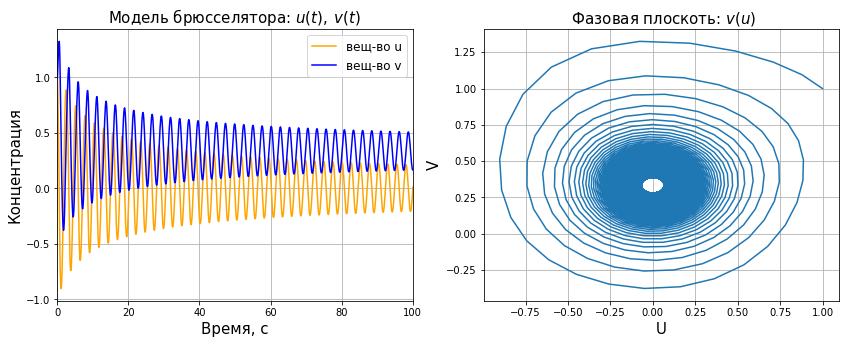

In [150]:
A, B = 1, 2
func.__defaults__ = (A, B)
print('Для параметров: A = ', A, ', B = ', B)

T, Y = fixed_stepsize(func, func_init, func_tmax, rk4, func_tmax/10000)
plot()

Для параметров: A =  1 , B =  2
Метод Адамса 4 порядка, всего шагов: 10000


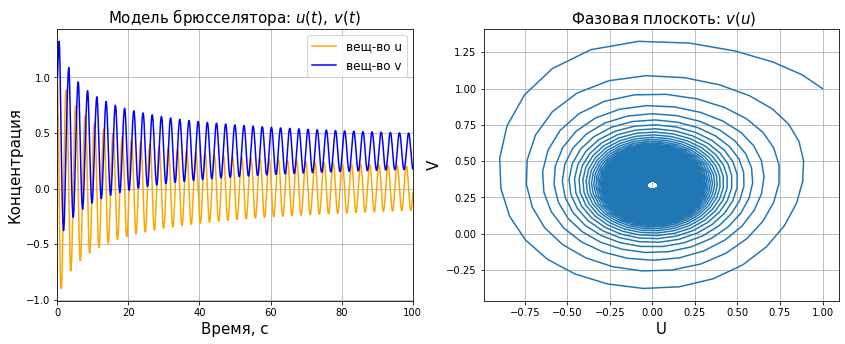

In [151]:
A, B = 1, 2
func.__defaults__ = (A, B)
print('Для параметров: A = ', A, ', B = ', B)

T, Y = fixed_stepsize(func, func_init, func_tmax, ad4, func_tmax/10000)
plot()

Получим численное решение для брюсселятора при $A = 1,\; B = 3$

Для параметров: A =  1 , B =  3
Классический метод РК 4 порядка, всего шагов: 10000


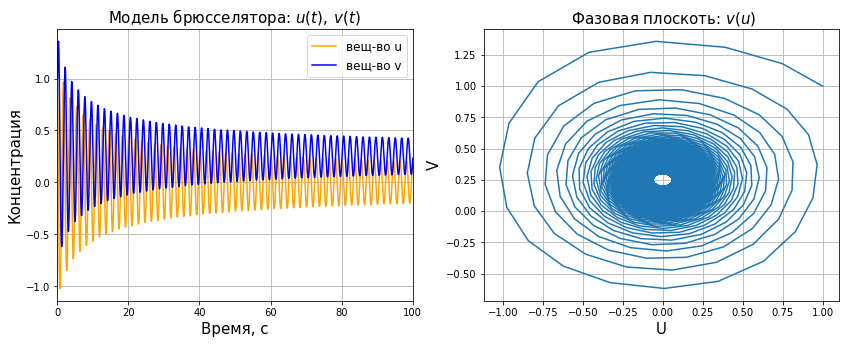

In [152]:
A, B = 1, 3
func.__defaults__ = (A, B)
print('Для параметров: A = ', A, ', B = ', B)

T, Y = fixed_stepsize(func, func_init, func_tmax, rk4, func_tmax/10000)
plot()

Для параметров: A =  1 , B =  3
Метод Адамса 4 порядка, всего шагов: 10000


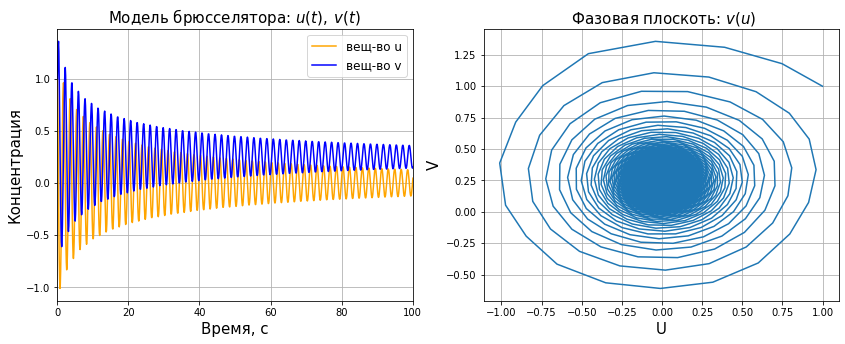

In [156]:
A, B = 1, 3
func.__defaults__ = (A, B)
print('Для параметров: A = ', A, ', B = ', B)

T, Y = fixed_stepsize(func, func_init, func_tmax, ad4, func_tmax/10000)
plot()

Получим численное решение для брюсселятора при $A = 1,\; B = 4$

Для параметров: A =  1 , B =  4
Классический метод РК 4 порядка, всего шагов: 10000


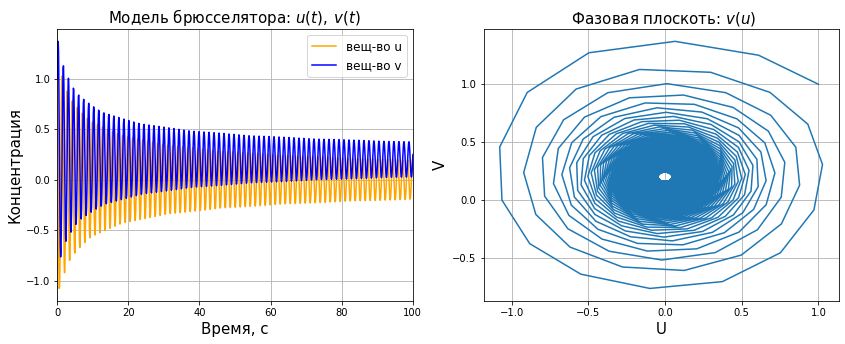

In [157]:
A, B = 1, 4
func.__defaults__ = (A, B)
print('Для параметров: A = ', A, ', B = ', B)

T, Y = fixed_stepsize(func, func_init, func_tmax, rk4, func_tmax/10000)
plot()

Для параметров: A =  1 , B =  4
Метод Адамса 4 порядка, всего шагов: 10000


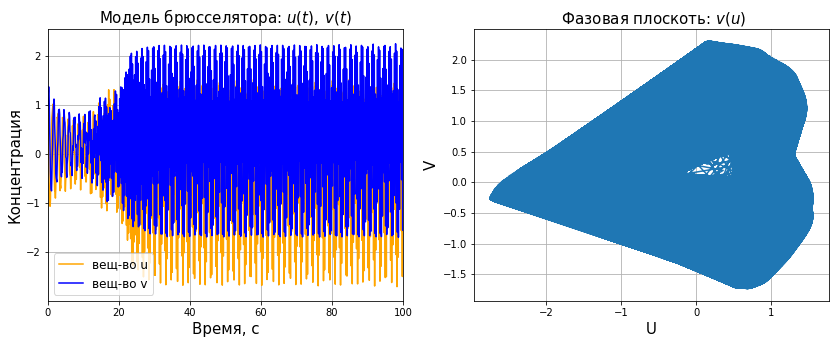

In [201]:
A, B = 1, 4
func.__defaults__ = (A, B)
print('Для параметров: A = ', A, ', B = ', B)

T, Y = fixed_stepsize(func, func_init, func_tmax, ad4, func_tmax/10000)
plot()

Как видим, для метода Адамса 4 порядка при $B = 4$ брюсселятор выходит из зоны устойчивости, однако предельный параметр выхода из зоны устойчивости наблюдается и при $B = 3.8$. 

Убедимся в этом ниже:  

Для параметров: A =  1 , B =  3.8
Метод Адамса 4 порядка, всего шагов: 10000


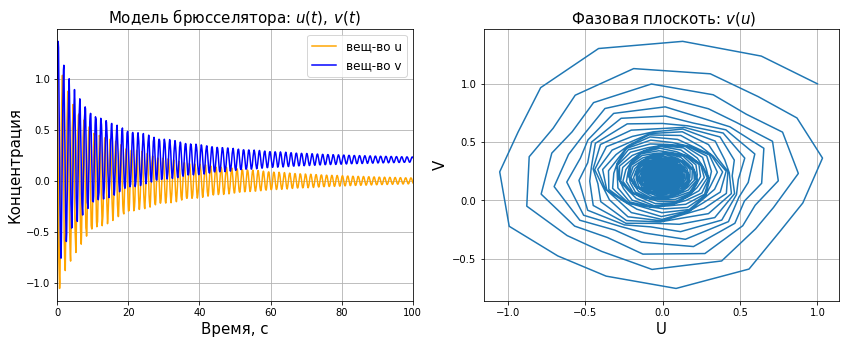

In [200]:
A, B = 1, 3.8
func.__defaults__ = (A, B)
print('Для параметров: A = ', A, ', B = ', B)

T, Y = fixed_stepsize(func, func_init, func_tmax, ad4, func_tmax/10000)
plot()

### Итог работы

Таким образом, результаты, даваемые двумя методами, совпадают. Можно увидеть предельный цикл на фазовой диаграмме.